<a href="https://colab.research.google.com/github/tomacro/IntroDataScience/blob/master/Job_Satisfaction_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We have done some analysis on popular languages and development platforms. Now let's look at a human aspect: job satisfaction. Using the survey results, we will look at some variables that each respondent gave about their job satisfaction. We will illustrate some principles of the CRISP-DM (Cross-industry standard process for data mining) model for our analysis as well.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Using the Pandas, Numpy, and MatPlotLib libraries

Now we will bring in the datasets from the targeted year.

In [52]:
# Importing survey results
df = pd.read_csv('data/2020_survey_results_public.csv')

In [53]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

**CRISP-DM: Business Understanding**

A happy workforce can be a productive workforce. But finding what makes your workforce happy can help shape the atmosphere within an organization.

We will be looking at how career satisfaction, compensation, and overtime affects overall job satisfaction.

**CRISP-DM: Data Understanding**

In [54]:
df['JobSat'].value_counts().reset_index()

,index,JobSat
0,Very satisfied,14611
1,Slightly satisfied,13930
2,Slightly dissatisfied,7124
3,Neither satisfied nor dissatisfied,5783
4,Very dissatisfied,3746


While a majority of respondents are satisfied at some level with their positions, we still need to find out if our selected factors have any relation.

In [80]:
df['NEWOvertime'].value_counts().reset_index()

,index,NEWOvertime
0,Sometimes: 1-2 days per month but less than we...,11547
1,Often: 1-2 days per week or more,11027
2,Occasionally: 1-2 days per quarter but less th...,9468
3,Rarely: 1-2 days per year or less,6471
4,Never,4718


**CRISP-DM: Data Preparation**

Before we can analyze the data, it must be prepared and cleaned. Let's start by converting the textual responses into a number for ease of future visualization.

In [89]:
data_convert = {"JobSat": {"Very satisfied": 5, "Slightly satisfied": 4, 
                              "Neither satisfied nor dissatisfied": 3, 
                              "Slightly dissatisfied": 2, "Very dissatisfied": 1},
                "OrgSize": {"10,000 or more employees": 9, "5,000 to 9,999 employees":
                8, "1,000 to 4,999 employees": 7, "500 to 999 employees": 6, 
                "100 to 499 employees": 5, "20 to 99 employees": 4, 
                "10 to 19 employees": 3, "2 to 9 employees": 2, 
                "Just me - I am a freelancer, sole proprietor, etc.": 1},
                "NEWOvertime": {"Never": 5, "Rarely: 1-2 days per year or less": 4, 
                 "Sometimes: 1-2 days per month but less than weekly": 3, 
                 "Occasionally: 1-2 days per quarter but less than monthly": 2, 
                 "Often: 1-2 days per week or more": 1}
                }
df_convert = df.replace(data_convert)

Now that we have a function that can effectively process our data to get it into the format that we need, let's build the variables we need for our analysis.

In [90]:
# Computing the average compensation based upon job satisfaction
converted_comp = df_convert.groupby(['JobSat']).mean()['ConvertedComp'].sort_values().reset_index()
converted_comp.set_index('JobSat', inplace=True)
converted_comp.sort_values(by=['JobSat'], ascending = False)

,ConvertedComp
JobSat,
5.0,119251.118370
4.0,97914.980343
3.0,91748.645352
2.0,95691.666029
1.0,98499.218481


While highest job satisfaction does have the highest average salary, all of the other values still have fairly high compensation values as well. Let's bring in a few more variables.

In [91]:
org_size = df_convert.groupby(['JobSat']).mean()['OrgSize'].sort_values().reset_index()
org_size.set_index('JobSat', inplace=True)
org_size.sort_values(by=['JobSat'], ascending = False)

,OrgSize
JobSat,
5.0,5.021448
4.0,5.118858
3.0,4.955623
2.0,5.184437
1.0,4.954384


Job Satisfaction does appear to change based upon size of the organization. The average sized-company appears to be between 10 and 100 people.

In [92]:
overtime = df_convert.groupby(['JobSat']).mean()['NEWOvertime'].sort_values().reset_index()
overtime.set_index('JobSat', inplace=True)
overtime.sort_values(by=['JobSat'], ascending = False)

,NEWOvertime
JobSat,
5.0,2.619782
4.0,2.646613
3.0,2.664222
2.0,2.624144
1.0,2.661948


Interestingly enough, job satisfaction does not seem to be influenced by overtime.

Now we will combine the dataframes to view the information together and the build our graphs.

In [126]:
comp_orgsize = pd.merge(converted_comp, org_size, on='JobSat')
comp_orgsize_otime = pd.merge(comp_orgsize, overtime, on='JobSat')
comp_orgsize_otime.sort_values(by=['JobSat'], ascending = False)

,ConvertedComp,OrgSize,NEWOvertime
JobSat,,,
5.0,119251.118370,5.021448,2.619782
4.0,97914.980343,5.118858,2.646613
3.0,91748.645352,4.955623,2.664222
2.0,95691.666029,5.184437,2.624144
1.0,98499.218481,4.954384,2.661948


In [127]:
comp_orgsize_otime['ConvertedComp'] = (comp_orgsize_otime['ConvertedComp'] - comp_orgsize_otime['ConvertedComp'].mean())/comp_orgsize_otime['ConvertedComp'].sum()
comp_orgsize_otime['OrgSize'] = comp_orgsize_otime['OrgSize'] - comp_orgsize_otime['OrgSize'].mean()
comp_orgsize_otime['NEWOvertime'] = comp_orgsize_otime['NEWOvertime'] - comp_orgsize_otime['NEWOvertime'].mean()

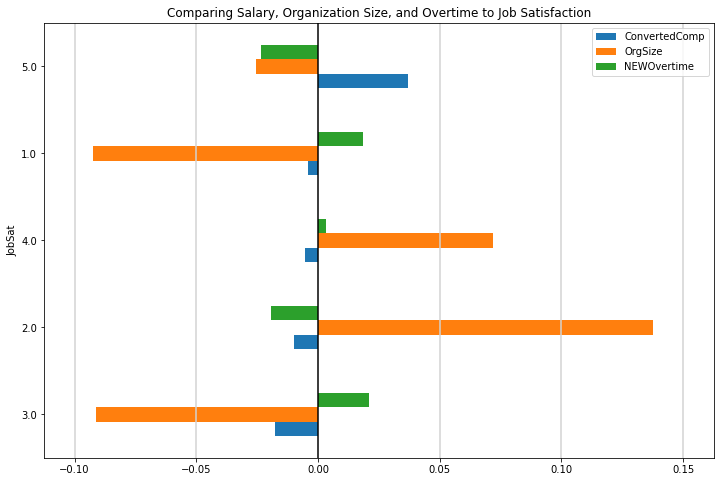

In [131]:
(comp_orgsize_otime).plot(kind='barh',
                         title='Comparing Salary, Organization Size, and Overtime to Job Satisfaction',
                         figsize=(12,8))

for i in [-0.1, -0.05, 0.05, 0.1, 0.15]:
    plt.axvline(x=i, color='lightgrey')
plt.axvline(x=0, color='black')

**CRISP-DM: Evaluation**
From the horizontal bar plot, we can draw some conclusions from our data. There appears to be some interesting negative and positive correlations for organization side, but salary and overtime do not necessary affect job satisfaction as much as one may suspect.